# 概率、高斯和贝叶斯定理

In [7]:
%matplotlib inline

from lean import book_format
book_format.set_style()

## 一、介绍
上一章最后讨论了离散贝叶斯滤波器的一些缺点。**对于许多跟踪和滤波问题，我们渴望拥有一个单峰和连续的滤波器**。也就是说，我们希望使用浮点数学（连续）对系统进行建模，并且只有一个可信的表示（单峰）。例如，我们想说一架飞机位于 （12.34， -95.54， 2389.5），即纬度、经度和高度。我们不希望过滤器告诉我们“它可能在 （1.65， -78.01， 2100.45） 或可能在 （34.36， -98.23， 2543.79）”。这与我们对世界如何运作的物理直觉不符，正如我们所讨论的，计算多模态情况可能非常昂贵。当然，多个位置估计也就不可能用于导航

## 二、均值、方差和标准差
你们中的大多数人都接触过统计学，但是无论如何，请允许我再次介绍这些材料。我要求您阅读这些材料，即使您确定自己非常了解它。我有两个原因：首先，我想确保我们以同样的方式使用术语。其次，我努力形成对统计学的直观理解，这将在后面的章节中很好地为您服务。很容易完成统计课程，只记住公式和计算，也许对你所学内容的含义感到模糊。

### 1. 随机变量
每次掷骰子时，结果将在 1 到 6 之间。如果我们掷出一百万次质地均匀的骰子，我们在 1/6的时间会得到点数 1。因此，我们说结果 1 的概率或几率是 1/6。同样，如果我问你下一次掷骰的结果为 1 的可能性，你会回答 1/6。

这种值和相关概率的组合称为随机变量。这里的随机并不意味着这个过程是不确定的，只是我们缺乏关于结果的信息。掷骰子的结果是确定性的，但我们缺乏足够的信息来计算结果。我们不知道会发生什么，除了概率。

当我们定义时间时时，它的值的范围称为样本空间。对于骰子，样本空间为 {1， 2， 3， 4， 5， 6}。对于硬币，样本空间为{H，T}。空间是一个数学术语，意思是有结构的集合。骰子的样本空间是 1 到 6 范围内的自然数的子集。

随机变量的另一个例子是大学学生的身高。这里的样本空间是生物学定义的两个极限之间的实数值范围。

随机变量（如抛硬币和掷骰子）是离散随机变量。这意味着它们的样本空间由有限数量的值或可数无限数量的值（如自然数）表示。人类的身高被称为连续随机变量，因为它们可以在两个极限之间取任何实际值。

不要将随机变量的测量值与实际值混淆。如果我们只能测量一个人的身高到0.1米，我们只会记录0.1，0.2，0.3...2.7的值，产生27个离散选择。尽管如此，一个人的身高可以在这些范围之间的任意实值之间变化，因此身高是一个连续的随机变量。

在统计学中，大写字母用于随机变量，通常来自字母表的后半部分。所以，我们可以说 𝑋 是表示抛骰子的随机变量，或 𝑌 是新生诗歌班学生的高度。后面的章节使用线性代数来解决这些问题，因此我们将遵循向量使用小写和矩阵使用大写的惯例。不幸的是，这些约定是冲突的，您必须根据上下文确定作者正在使用哪个。我总是对向量和矩阵使用粗体符号，这有助于区分两者。

### 2.概率分布
概率分布给出了随机变量在样本空间中获取任何值的概率。例如，对于一个质地均匀的六面骰子，我们可能会说：

|值|概率|
|-----|-----------|
|1|1/6|
|2|1/6|
|3|1/6|
|4|1/6|
|5|1/6|
|6|1/6|

我们用小写的 p 表示此分布： p（x）使用普通的函数表示法，我们将会写做：

$$P(X{=}4) = p(4) = \frac{1}{6}$$

这说明骰子落在 4 上的概率为 1/6。 𝑃(𝑋=𝑥𝑘)是“概率 𝑋 存在 𝑥𝑘".请注意细微的符号差异。大写 𝑃 表示单个事件的概率，小写 𝑝 是概率分布函数。如果你不善于观察，这可能会让你误入歧途。有些文本使用 𝑃𝑟 而不是 𝑃 来改善这一点。

另一个例子是公平的硬币。它具有样本空间 {H， T}。硬币是公平的，所以正面（H）的概率是50%，反面（T）的概率是50%。我们把它写成：
$$\begin{gathered}P(X{=}H) = 0.5\\P(X{=}T)=0.5\end{gathered}$$

样本空间不是唯一的。骰子的一个样本空间是 {1， 2， 3， 4， 5， 6}。另一个有效的样本空间是 {偶数，奇数}。另一个可能是{所有角落的点，而不是所有角落的点}。样本空间只要涵盖所有可能性，并且任何单个事件仅由一个元素描述(事件相互独立)，它就是有效的。{even， 1， 3， 4， 5} 不是骰子的有效样本空间，因为值 4 与“偶数”和“4”匹配。

离散随机值的所有值的概率称为离散概率分布，连续随机值的所有值的概率称为连续概率分布。

作为概率分布，每个值的概率 𝑥i 必须是 𝑥i≥0，因为没有概率可以小于零。其次，所有值的概率之和必须等于 1。对于抛硬币来说，这应该直观地清楚：如果获得正面的几率是 70%，那么获得反面的几率必须是 30%。我们将此要求表述为:
- 对于离散分布
  $$\sum\limits_u P(X{=}u)= 1$$
- 对于连续分布
  $$\int\limits_u P(X{=}u) \,du= 1$$

在上一章中，我们使用概率分布来估计狗在走廊中的位置。例如：

sum =  1.0


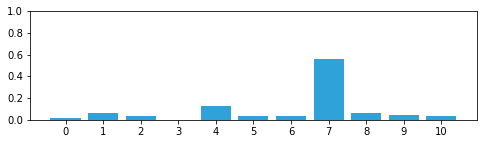

In [1]:
import numpy as np
import lean.kf_book.book_plots as book_plots

belief = np.array([1, 4, 2, 0, 8, 2, 2, 35, 4, 3, 2])
belief = belief / np.sum(belief)
with book_plots.figsize(y=2):
    book_plots.bar_plot(belief)
print('sum = ', np.sum(belief))

每个位置的概率介于 0 和 1 之间，并且所有位置的总和等于 1，因此这使其成为概率分布。每个概率都是离散的，因此我们可以更准确地称之为离散概率分布。在实践中，我们省略了离散和连续这两个术语，除非我们有特殊的理由进行这种区分。

### 3. 随机变量的均值、中位数和众数

给定一组数据，我们通常想知道该集合的代表性或平均值。对此有很多措施，这个概念被称为集中趋势的衡量标准。例如，我们可能想知道班级中学生的平均身高。我们都知道如何找到一组数据的平均值，但让我详细说明这一点，以便我可以引入更正式的符号和术语。平均值的另一个词是平均值。我们通过对值求和并除以值的数量来计算平均值。如果学生的身高（以米为单位）。
$$X = \{1.8, 2.0, 1.7, 1.9, 1.6\}$$
我们计算平均值为：
$$\mu = \frac{1.8 + 2.0 + 1.7 + 1.9 + 1.6}{5} = 1.8$$
使用符号是传统 μ （mu）表示平均值。
我们可以用等式形式化这个计算：
$$ \mu = \frac{1}{n}\sum^n_{i=1} x_i$$
NumPy提供计算平均值。numpy.mean()

In [4]:
x = [1.8, 2.0, 1.7, 1.9, 1.6]
np.mean(x)

1.8

一组数字的模式是最常出现的数字。如果只有一个数字最常出现，我们说它是一个单峰集合，如果两个或多个数字出现的频率相同，那么该集合是多模态的。例如，集合 {1， 2， 2， 2， 3， 4， 4， 4} 具有模式 2 和 4，这是多模态的，集合 {5， 7， 7， 13} 具有模式 7，因此它是单峰的。在本书中，我们不会以这种方式计算模态，但我们确实在更一般的意义上使用了单峰和多模态的概念。例如，在离散贝叶斯一章中，我们谈到了我们对狗的位置作为多模态分布的信念，因为我们为不同的位置分配了不同的概率。

最后，一组数字的中位数是该集合的中点，因此一半的值低于中位数，一半高于中位数。这里，上面和下面与正在排序的集合有关。如果集合包含偶数个值，则两个中间数字平均在一起。

Numpy 提供计算中位数。如您所见，{1.8， 2.0， 1.7， 1.9， 1.6} 的中位数是 1.8，因为 1.8 是排序后该集合的第三个元素。在这种情况下，中位数等于平均值，但这通常不是真的。numpy.median()

In [5]:
np.median(x)

1.8

### 4.随机变量的期望值
随机变量的期望值是如果我们取无限数量的样本，然后将这些样本平均在一起时它的平均值。假设我们有 x=[1，3，5] 并且每个值的概率相等。我们期望x是什么值，平均值？

当然，这将是 1、3 和 5 的平均值，即 3。这应该是有道理的;我们预计会出现相等数量的 1、3 和 5，因此 （1+3+5）/3=3 显然是无限系列样本的平均值。换句话说，这里的期望值是样本空间的平均值。

现在假设每个值都有不同的发生概率。假设 1 有 80% 的几率发生，3 有 15% 的几率，5 只有 5% 的几率。在这种情况下，我们通过概率乘以每个值来计算期望值，并对结果求和。对于这种情况，我们可以计算。
$$\mathbb E[X] = (1)(0.8) + (3)(0.15) + (5)(0.05) = 1.5$$

在这里我介绍了符号 𝔼[𝑋] 对于预期值 𝑥 .有些文本使用 𝐸(𝑥) .很明显地，值 1.5 表示 𝑥 更有意义，因为 𝑥 比 3 或 5 更有可能是 1，3 也比 5 更有可能。

我们可以将期望的公式表示为：
$$\mathbb E[X] = \sum_{i=1}^n p_ix_i$$

简单的代数只是表明，如果概率都相等，则期望值与平均值相等
$$\mathbb E[X] = \sum_{i=1}^n p_ix_i = \frac{1}{n}\sum_{i=1}^n x_i = \mu_x$$

如果 𝑥 是连续的，我们将总和替换为积分，如下所示
$$\mathbb E[X] = \int_{a}^b\, xf(x) \,dx$$

𝑓(𝑥) 是 𝑥 概率分布函数。不过我们暂时不会使用这个等式，但我们将在下一章中使用它。

我们可以写一些 Python 来模拟这一点。在这里，我取了 1，000，000 个样本，并计算了我们刚刚通过分析计算的分布的期望值。

In [11]:
total = 0
N = 1000000
for r in np.random.rand(N):
    if r < 0.80:
        total += 1
    elif r < 0.95:
        total += 3
    else:
        total += 5
        
total / N

1.499742

您可以看到计算值接近理论的期望值。它不精确，因为获得精确值需要无限的样本量。

#### 练习题 1
投掷骰子的期望值是多少？

#### 求解方法
骰子每一面的可能性相等，因此每一方的概率为 1/6。因此：
$$\begin{aligned}
\mathbb E[X] &= 1/6\times1 + 1/6\times 2 + 1/6\times 3 + 1/6\times 4 + 1/6\times 5 + 1/6\times6 \\
&= 1/6(1+2+3+4+5+6)\\&= 3.5\end{aligned}$$

#### 练习题 2
给定连续的均匀分布
$$f(x) = \frac{1}{b - a}$$
当  $a=0$ and $b=20$时，求解其期望值？

#### 求解方法

$$\begin{aligned}
\mathbb E[X] &= \int_0^{20}\, x\frac{1}{20} \,dx \\
&= \bigg[\frac{x^2}{40}\bigg]_0^{20} \\
&= 10 - 0 \\
&= 10
\end{aligned}$$

### 5.随机变量的方差
上面的计算告诉我们学生的平均身高，但它并没有告诉我们我们可能想知道的一切。例如，假设我们有三类学生，我们将其标记为 𝑋, 𝑌和 𝑍 ，具有以下高度：

In [12]:
X = [1.8, 2.0, 1.7, 1.9, 1.6]
Y = [2.2, 1.5, 2.3, 1.7, 1.3]
Z = [1.8, 1.8, 1.8, 1.8, 1.8]

使用NumPy，我们看到每个类的平均高度是相同的。

In [13]:
np.mean(X), np.mean(Y), np.mean(Z)

(1.8, 1.8, 1.8)

每个类的平均值为 1.8 米，但请注意，第二类的高度变化比第一类大得多，而第三类根本没有变化。

均值告诉我们一些关于数据的信息，但不是整个完整的信息。我们希望能够确定学生的身高之间有多少差异。你可以想象这有很多原因。也许一个学区需要订购 5，000 张桌子，他们希望确保购买适合学生身高范围的尺寸。

统计学已将测量差异的概念正式化为标准差和方差的概念。计算方差的公式为：
$$\mathit{VAR}(X) = \mathbb  E[(X - \mu)^2]$$

暂时忽略平方项的影响，您可以看到方差是样本空间X变量和均值差值($X-\mu)$的期望值。稍后，我将会解释平方项的意义与目的。

期望值的公式为 $\mathbb E[X] = \sum\limits_{i=1}^n p_ix_i$， 因此，我们可以将其代入上面的等式中，得到：
$$\mathit{VAR}(X) = \frac{1}{n}\sum_{i=1}^n (x_i - \mu)^2$$

让我们计算这三个类的方差，看看我们得到什么值？并熟悉这个概念。

$X$的均值是 1.8 ($\mu_x = 1.8$) ,因此我们可以计算：
$$ 
\begin{aligned}
\mathit{VAR}(X) &=\frac{(1.8-1.8)^2 + (2-1.8)^2 + (1.7-1.8)^2 + (1.9-1.8)^2 + (1.6-1.8)^2} {5} \\
&= \frac{0 + 0.04 + 0.01 + 0.01 + 0.04}{5} \\
\mathit{VAR}(X)&= 0.02 \, m^2
\end{aligned}$$

NumPy 提供了计算方差的函数：var()

In [14]:
print(f"{np.var(X):.2f} meters squared")

0.02 meters squared


这可能有点难以解释。高度以米为单位，但方差以米平方为单位。因此，我们有一个更常用的度量，标准差，它定义为方差的平方根：

$$\sigma = \sqrt{\mathit{VAR}(X)}=\sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

这是典型的使用 σ 对于标准差和 σ2 对于差异。在本书的大部分内容中，我将使用 σ2 而不是 VAR(𝑋) 对于方差;它们象征着同一件事。
对于第一类，我们可以计算出它的标准差为：
$$ 
\begin{aligned}
\sigma_x &=\sqrt{\frac{(1.8-1.8)^2 + (2-1.8)^2 + (1.7-1.8)^2 + (1.9-1.8)^2 + (1.6-1.8)^2} {5}} \\
&= \sqrt{\frac{0 + 0.04 + 0.01 + 0.01 + 0.04}{5}} \\
\sigma_x&= 0.1414
\end{aligned}$$

我们可以使用计算标准偏差的 NumPy 方法来验证此计算。“std”是标准差的常见缩写。numpy.std()

In [15]:
print(f"std {np.std(X):.4f}")
print(f"var {np.std(X)**2:.4f}")

std 0.1414
var 0.0200


当然， 0.14142=0.02 ，这与我们之前对方差的计算一致.

标准差意味着什么？它告诉我们彼此之间的高度差异有多大。“多大”不是一个数学术语。一旦我们在下一节中介绍高斯的概念，我们将能够更精确地定义它。现在我要说的是，对于许多事情，所有值的 68% 都在平均值的一个标准差内。换句话说，我们可以得出结论，对于随机班级，68% 的学生的身高在 1.66 （1.8-0.1414） 米到 1.94 （1.8+0.1414） 米之间。

我们可以在绘图中查看：

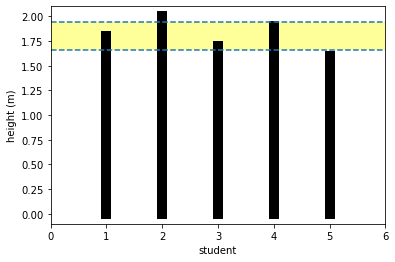

In [16]:
from lean.kf_book.gaussian_internal import plot_height_std
import matplotlib.pyplot as plt

plot_height_std(X)

对于只有 5 名学生，我们显然不会在一个标准差内获得 68%。我们确实看到五分之三的学生在 ±1σ ，或 60%。但是，我们只用了仅仅5个样本就可以这么接近 68 %。那么，让我们看一下有 100 名学生的班级的结果。

> **我们将一个标准差写为 1σ ，发音为“一个标准差”，而不是“一西格玛”。两个标准差为 2σ**

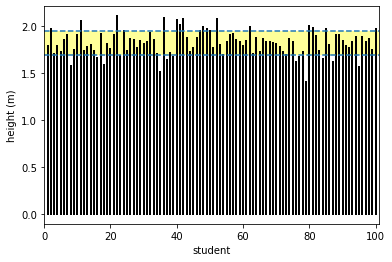

mean = 1.817
std  = 0.129


In [27]:
from numpy.random import randn
data = 1.8 + randn(100)*.1414
mean, std = data.mean(), data.std()

plot_height_std(data, lw=2)
print(f'mean = {mean:.3f}')
print(f'std  = {std:.3f}')

通过肉眼看，大约68%的高度位于 ±1σ 平均值为 1.8，但我们可以用代码验证这一点。

In [28]:
np.sum((data > mean - std) & (data < mean + std)) / len(data) * 100

69.0

我们将很快对此进行更深入的讨论。现在让我们计算:

$$Y = [2.2, 1.5, 2.3, 1.7, 1.3]$$

 $Y$ 的平均值是 $\mu=1.8$ m, 所以

$$ 
\begin{aligned}
\sigma_y &=\sqrt{\frac{(2.2-1.8)^2 + (1.5-1.8)^2 + (2.3-1.8)^2 + (1.7-1.8)^2 + (1.3-1.8)^2} {5}} \\
&= \sqrt{0.152} = 0.39 \ m
\end{aligned}$$
我们将用 NumPy 验证这一点

In [29]:
print(f"std of Y is {np.std(Y):.2f} m")

std of Y is 0.39 m


这符合我们的预期。𝑌的高度变化更大，并且标准差更大。

最后，让我们计算 𝑍， 它的值没有变化，因此我们期望标准差为零。

$$ 
\begin{aligned}
\sigma_z &=\sqrt{\frac{(1.8-1.8)^2 + (1.8-1.8)^2 + (1.8-1.8)^2 + (1.8-1.8)^2 + (1.8-1.8)^2} {5}} \\
&= \sqrt{\frac{0+0+0+0+0}{5}} \\
\sigma_z&= 0.0 \ m
\end{aligned}$$

在我们继续之前，我需要指出，我忽略了平均男性比女性高。一般来说，只包含男性或女性的班级的身高方差将小于男女班级的身高差异。其他因素也是如此。营养良好的儿童比营养不良的儿童高。斯堪的纳维亚人比意大利人高。在设计实验时，统计学家需要考虑这些因素。

我建议我们可以执行此分析来订购学区的书桌。对于每个年龄组，可能有两种不同的平均值 - 一种聚集在女性的平均身高周围，另一种平均值聚集在男性的平均身高周围。整个班级的平均值将介于两者之间。如果我们为所有学生的平均值购买书桌，我们最终可能会得到既不适合学校男性也不适合女性的书桌！

我们不会在本书中考虑这些问题。如果您需要学习处理这些问题的技术，请查阅任何标准概率文本。

### 6.为什么是差异的平方
为什么我们要用差值的平方来计算方差？我可以做很多数学，但让我们用简单的方式看一下。这是绘制的 𝑋 值到其均值的图表，其中 𝑋=[3，−3，3，−3]

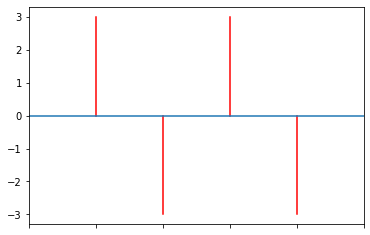

In [31]:
X = [3, -3, 3, -3]
mean = np.average(X)
for i in range(len(X)):
    plt.plot([i ,i], [mean, X[i]], color='r')
plt.axhline(mean)
plt.xlim(-1, len(X))
plt.tick_params(axis='x', labelbottom=False)

如果我们不取差异的平方，符号将抵消掉：
$$\frac{(3-0) + (-3-0) + (3-0) + (-3-0)}{4} = 0$$

这显然是不正确的，因为数据存在差异，其方差应该大于 0。

也许我们可以使用绝对值？我们可以通过检查看到结果是 12/4=3 这当然是正确的 — 每个值与平均值相差 3。但是，如果我们有 𝑌=[6，−2，−3，1] ?在这种情况下，我们得到 12/4=3
。𝑌 显然比 𝑋更分散，但计算产生相同的方差。如果我们使用平方的公式，我们得到Y的方差为 3.5，这可以反映其较大的变化。

这不是正确性的证明。事实上，该技术的发明者卡尔·弗里德里希·高斯（Carl Friedrich Gauss）认识到它有些武断。如果存在异常值，则对差异进行平方会给该项带来不成比例的权重。例如，让我们看看如果我们有：

In [32]:
X = [1, -1, 1, -2, -1, 2, 1, 2, -1, 1, -1, 2, 1, -2, 100]
print(f'Variance of X with outlier    = {np.var(X):6.2f}')
print(f'Variance of X without outlier = {np.var(X[:-1]):6.2f}')

Variance of X with outlier    = 621.45
Variance of X without outlier =   2.03


这是“正确”的吗？你告诉我。如果没有 100 的异常值，我们得到 σ2=2.03，准确地反映了如何 𝑋 在没有异常值的情况下变化。一个异常值淹没了方差计算。我们是想淹没计算，以便我们知道存在异常值，还是稳健地合并异常值，并且仍然提供接近没有异常值的值的估计值？再说一遍，你告诉我。显然，这取决于您的问题。

我不会继续沿着这条路走下去;我不会继续走下去。如果你有兴趣，你可能想看看James Berger在这个问题上所做的工作，在一个叫做贝叶斯鲁棒性的领域，或者Peter J. Huber关于鲁棒统计的优秀出版物[4]。在本书中，我们将始终使用高斯定义的方差和标准差。

从中可以收集的要点是，这些汇总统计数据总是讲述一个关于我们数据的不完整故事。在这个例子中，高斯定义的方差并没有告诉我们有一个大的异常值。但是，它是一个强大的工具，因为我们可以用几个数字简洁地描述一个大型数据集。如果我们有 10 亿个数据点，我们就不会想用肉眼检查绘图或查看数字列表;汇总统计为我们提供了一种以有用的方式描述数据形状的方法。

## 三、高斯

我们现在准备了解高斯。让我们提醒自己这一章的动机。
> 我们想要一种单模态的、连续的方式来表示概率，以模拟现实世界的运作方式，并且计算起来是有效的。

让我们看一个高斯分布图，以了解我们在说什么。

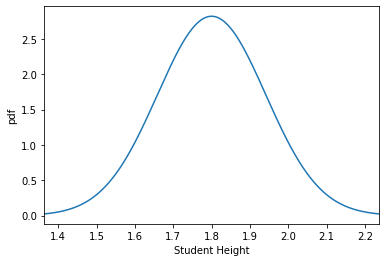

In [33]:
from filterpy.stats import plot_gaussian_pdf
plot_gaussian_pdf(mean=1.8, variance=0.1414**2, 
                  xlabel='Student Height', ylabel='pdf');